In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet('green_tripdata_2022-11.parquet')
df.shape

(62313, 20)

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,0.5,0.5,1.45,0.0,None,0.3,7.25,1.0,1.0,0.00
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,0.0,0.0,9.61,0.0,None,0.3,57.66,1.0,2.0,2.75
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,0.5,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,0.5,0.5,0.00,0.0,None,0.3,11.80,2.0,1.0,0.00
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,0.5,0.5,1.58,0.0,None,0.3,7.88,1.0,1.0,0.00


In [6]:
# let's check unique values
columns=df.columns
for col in columns:
    print(col,':\n',df[col].unique())
    print(df[col].value_counts())
    print('\n',20*'**','\n')

VendorID :
 [2 1]
2    55432
1     6881
Name: VendorID, dtype: int64

 **************************************** 

lpep_pickup_datetime :
 ['2022-11-01T00:28:37.000000000' '2022-11-01T00:51:02.000000000'
 '2022-11-01T00:51:50.000000000' ... '2022-11-30T23:27:00.000000000'
 '2022-11-30T23:29:00.000000000' '2022-11-30T23:05:00.000000000']
2022-11-11 19:59:00    5
2022-11-18 19:17:11    4
2022-11-17 07:50:00    4
2022-11-18 13:10:00    4
2022-11-01 16:00:47    3
                      ..
2022-11-11 09:43:51    1
2022-11-11 09:59:33    1
2022-11-11 09:06:33    1
2022-11-11 09:15:48    1
2022-11-16 21:32:58    1
Name: lpep_pickup_datetime, Length: 60547, dtype: int64

 **************************************** 

lpep_dropoff_datetime :
 ['2022-11-01T00:31:56.000000000' '2022-11-01T01:12:50.000000000'
 '2022-11-01T00:55:38.000000000' ... '2022-11-30T23:46:00.000000000'
 '2022-11-30T23:30:00.000000000' '2022-11-30T23:23:00.000000000']
2022-11-11 18:55:00    6
2022-11-13 00:00:00    5
2022-11-03 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62313 entries, 0 to 62312
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62313 non-null  int64         
 1   lpep_pickup_datetime   62313 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62313 non-null  datetime64[ns]
 3   store_and_fwd_flag     56192 non-null  object        
 4   RatecodeID             56192 non-null  float64       
 5   PULocationID           62313 non-null  int64         
 6   DOLocationID           62313 non-null  int64         
 7   passenger_count        56192 non-null  float64       
 8   trip_distance          62313 non-null  float64       
 9   fare_amount            62313 non-null  float64       
 10  extra                  62313 non-null  float64       
 11  mta_tax                62313 non-null  float64       
 12  tip_amount             62313 non-null  float64       
 13  t

In [5]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [7]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62313.000000,56192.000000,62313.000000,62313.000000,56192.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,62313.000000,56192.000000,56192.000000,56192.000000
mean,1.889574,1.240408,98.757659,139.787797,1.307179,83.301308,14.990903,0.339127,0.422921,2.014565,0.218133,0.297574,18.976286,1.352007,1.052267,0.763583
std,0.313423,0.940917,62.278566,76.824984,0.960456,3374.500924,18.093849,0.620629,0.183723,2.766108,1.285773,0.034413,19.341514,0.502619,0.222567,1.231793
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-100.000000,-4.500000,-0.500000,-1.160000,0.000000,-0.300000,-100.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,66.000000,74.000000,1.000000,1.180000,7.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.300000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.010000,11.000000,0.000000,0.500000,1.560000,0.000000,0.300000,14.760000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,223.000000,1.000000,3.650000,17.500000,0.500000,0.500000,3.000000,0.000000,0.300000,22.110000,2.000000,1.000000,2.750000
max,2.000000,6.000000,265.000000,265.000000,9.000000,241021.090000,2020.200000,4.500000,0.500000,110.880000,73.750000,0.300000,2021.000000,5.000000,2.000000,2.750000


array([[<AxesSubplot:title={'center':'VendorID'}>,
        <AxesSubplot:title={'center':'lpep_pickup_datetime'}>,
        <AxesSubplot:title={'center':'lpep_dropoff_datetime'}>,
        <AxesSubplot:title={'center':'RatecodeID'}>],
       [<AxesSubplot:title={'center':'PULocationID'}>,
        <AxesSubplot:title={'center':'DOLocationID'}>,
        <AxesSubplot:title={'center':'passenger_count'}>,
        <AxesSubplot:title={'center':'trip_distance'}>],
       [<AxesSubplot:title={'center':'fare_amount'}>,
        <AxesSubplot:title={'center':'extra'}>,
        <AxesSubplot:title={'center':'mta_tax'}>,
        <AxesSubplot:title={'center':'tip_amount'}>],
       [<AxesSubplot:title={'center':'tolls_amount'}>,
        <AxesSubplot:title={'center':'improvement_surcharge'}>,
        <AxesSubplot:title={'center':'total_amount'}>,
        <AxesSubplot:title={'center':'payment_type'}>],
       [<AxesSubplot:title={'center':'trip_type'}>,
        <AxesSubplot:title={'center':'congestion_surcha

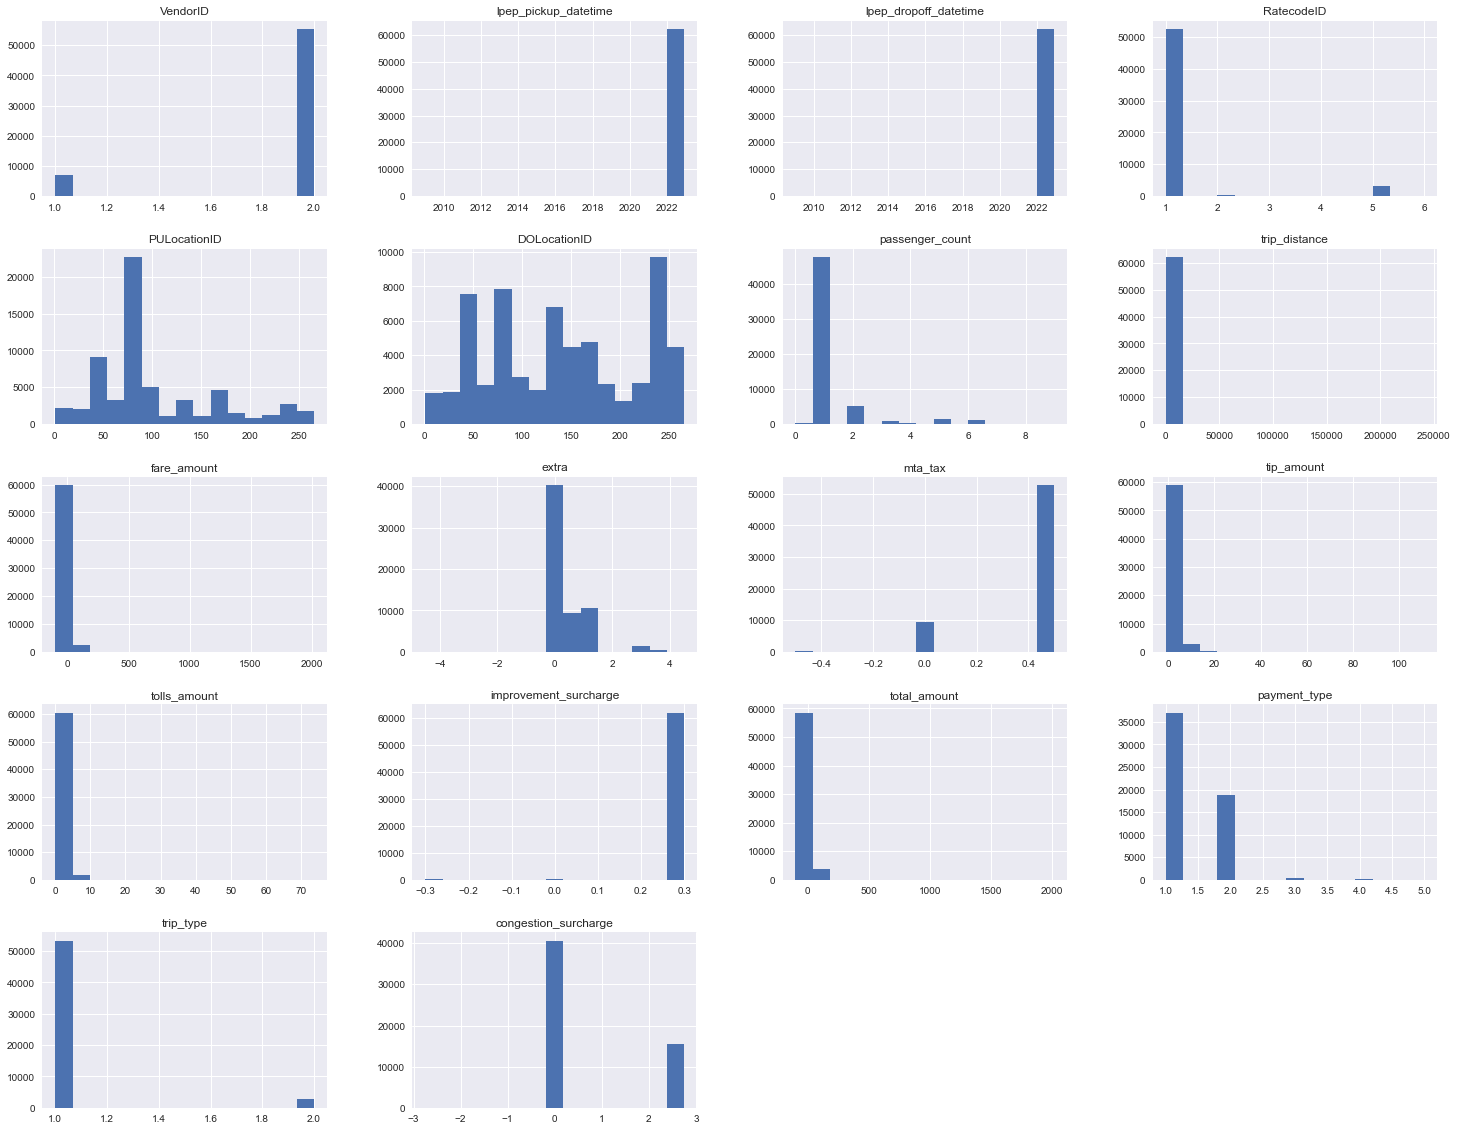

In [11]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

In [29]:
df['VendorID'].unique()

array([2, 1], dtype=int64)

In [30]:
df['VendorID'].value_counts()

2    55432
1     6881
Name: VendorID, dtype: int64

<AxesSubplot:xlabel='VendorID', ylabel='count'>

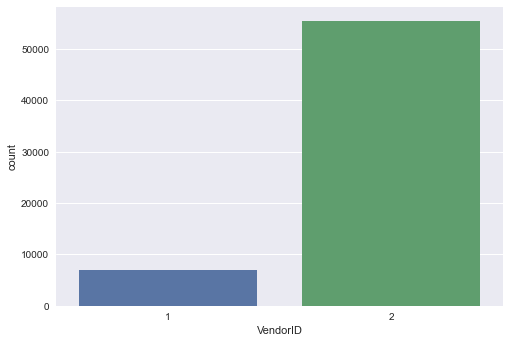

In [31]:
sns.countplot(x="VendorID", data=df)

<AxesSubplot:ylabel='VendorID'>

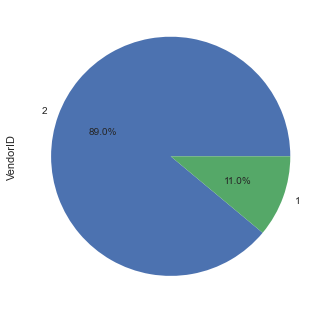

In [32]:
df['VendorID'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [18]:
df['trip_type'].unique()

array([ 1.,  2., nan])

In [14]:
df['trip_type'].value_counts()

1.0    53255
2.0     2937
Name: trip_type, dtype: int64

<AxesSubplot:xlabel='trip_type', ylabel='count'>

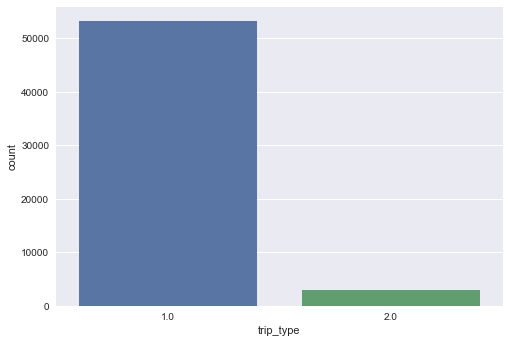

In [15]:
sns.countplot(x="trip_type", data=df)

<AxesSubplot:ylabel='trip_type'>

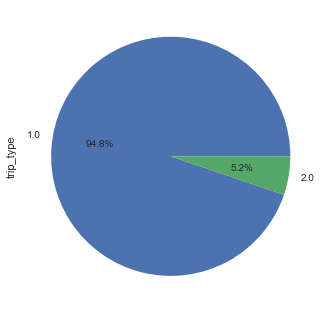

In [17]:
df['trip_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [19]:
df['improvement_surcharge'].unique()

array([ 0.3, -0.3,  0. ])

In [20]:
df['improvement_surcharge'].value_counts()

 0.3    61969
 0.0      184
-0.3      160
Name: improvement_surcharge, dtype: int64

<AxesSubplot:xlabel='improvement_surcharge', ylabel='count'>

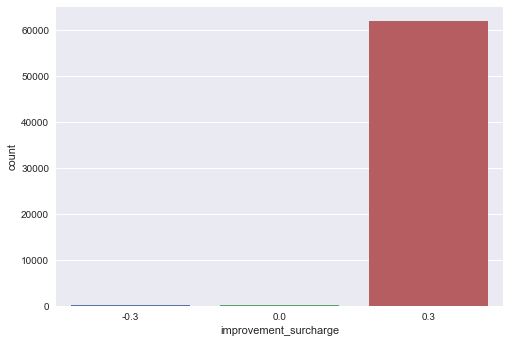

In [21]:
sns.countplot(x='improvement_surcharge', data=df)

<AxesSubplot:ylabel='improvement_surcharge'>

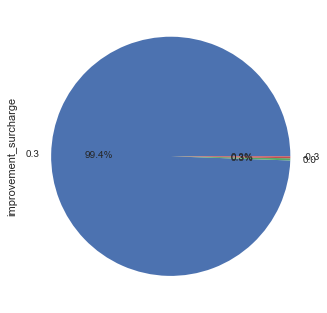

In [22]:
df['improvement_surcharge'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [23]:
df['payment_type'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [24]:
df['payment_type'].value_counts()

1.0    36999
2.0    18707
3.0      386
4.0       99
5.0        1
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

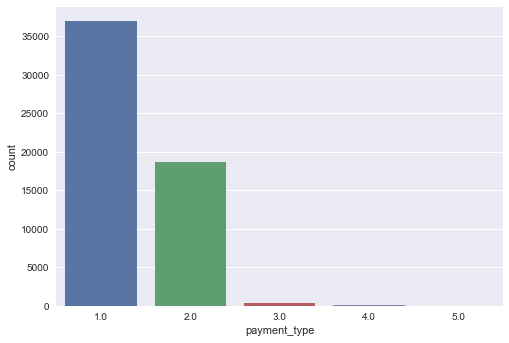

In [26]:
sns.countplot(x='payment_type', data=df)

<AxesSubplot:ylabel='payment_type'>

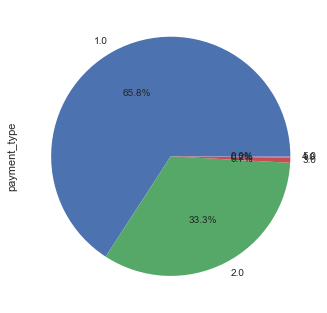

In [25]:
df['payment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df['VendorID'].unique()
df['VendorID'].value_counts()
sns.countplot(x="VendorID", data=df)
df['VendorID'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [14]:
df['year'] = df['lpep_pickup_datetime'].dt.year
df['month'] = df['lpep_pickup_datetime'].dt.month
df['day'] = df['lpep_pickup_datetime'].dt.day
df['weekday'] = df['lpep_pickup_datetime'].dt.day_name()
display(df.head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,year,month,day,weekday
0,2,2022-11-01 00:28:37,2022-11-01 00:31:56,N,1.0,223,223,1.0,0.71,4.5,...,None,0.3,7.25,1.0,1.0,0.00,2022,11,1,Tuesday
1,2,2022-11-01 00:51:02,2022-11-01 01:12:50,N,5.0,80,90,2.0,6.86,45.0,...,None,0.3,57.66,1.0,2.0,2.75,2022,11,1,Tuesday
2,2,2022-11-01 00:51:50,2022-11-01 00:55:38,N,1.0,244,244,2.0,0.58,4.5,...,None,0.3,5.80,2.0,1.0,0.00,2022,11,1,Tuesday
3,2,2022-11-01 00:03:32,2022-11-01 00:12:28,N,1.0,116,74,1.0,2.74,10.5,...,None,0.3,11.80,2.0,1.0,0.00,2022,11,1,Tuesday
4,2,2022-11-01 00:17:46,2022-11-01 00:22:03,N,1.0,134,134,1.0,0.91,5.0,...,None,0.3,7.88,1.0,1.0,0.00,2022,11,1,Tuesday


In [33]:
# print(df.groupby('weekday')['id'].count())

# sns.histplot(df['weekday'])